# Focusing a Gauss beam

In [1]:
from diffractio import np, plt
from diffractio import degrees, um

In [2]:
from diffractio.scalar_masks_XZ import Scalar_mask_XZ

In [3]:
from diffractio.vector_fields_X import Vector_field_X
from diffractio.scalar_sources_X import Scalar_source_X
from diffractio.vector_fields_XZ import Vector_field_XZ

In [4]:
from py_pol.jones_vector import Jones_vector

## Propagation of a Gauss Beam

In [5]:
x0 = np.linspace(-15*um, 15*um, 1024)
z0 = np.linspace(0*um, 40*um, 512)
wavelength = 1*um

u0 = Scalar_source_X(x=x0, wavelength=wavelength)
u0.gauss_beam(A=1, x0=0, w0=1*um, z0=20*um, theta=0)

In [6]:
j0 = Jones_vector().general_azimuth_ellipticity(azimuth=0*degrees, ellipticity=0*degrees)
print(j0)

E = 
[+1.000]   
[+0.000]   



In [7]:
EH_xz = Vector_field_XZ(x0,z0, wavelength)
EH_xz.incident_field(u0=u0, j0=j0)

In [8]:
EH_xz.FP_WPM(has_edges=False)

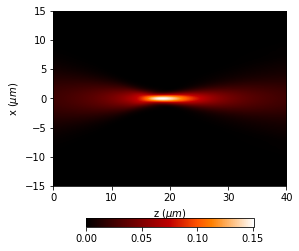

In [9]:
EH_xz.draw('intensity', logarithm=1e1, draw_borders=True, scale='scaled')

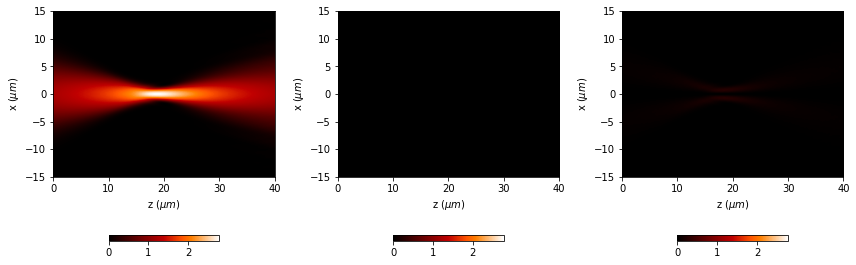

In [10]:
EH_xz.draw('intensities', logarithm=1e2, draw_z=True, draw_borders=True, scale='scaled')


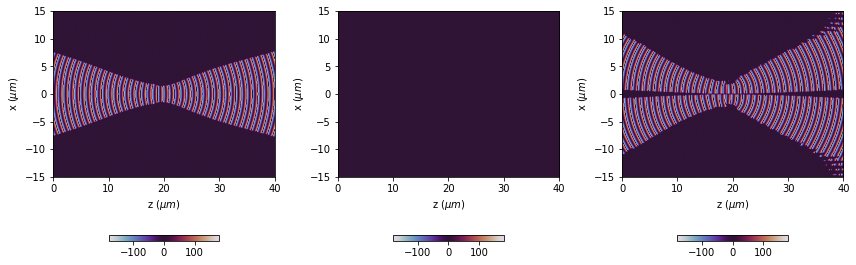

In [11]:
EH_xz.draw('phases', draw_z=True, percentage_intensity=0.01, draw_borders=True, scale='scaled')

0.0


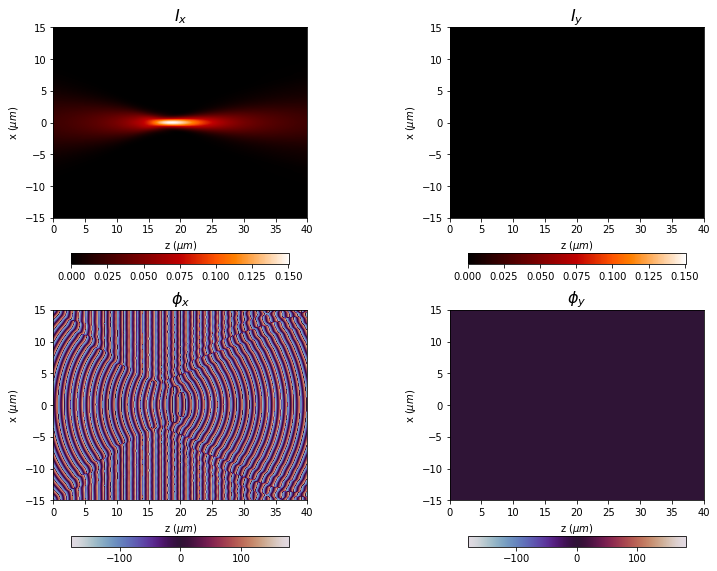

In [12]:
EH_xz.draw('fields', draw_borders=True, scale='scaled')

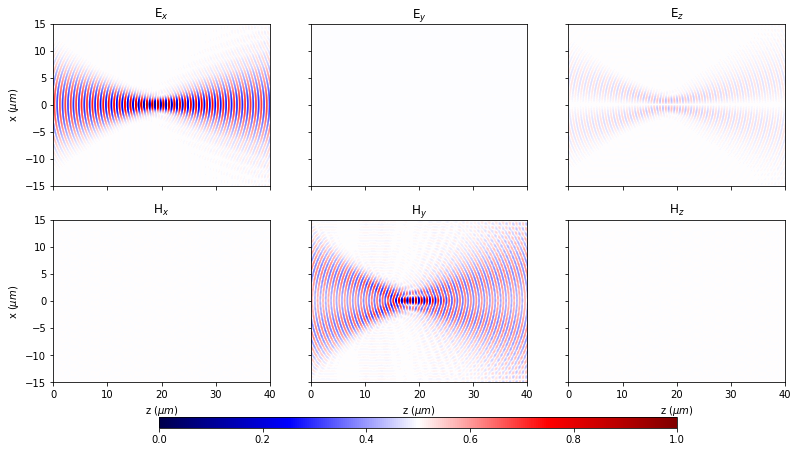

In [13]:
EH_xz.draw('EH', draw_z = True, draw_borders=True, scale='scaled')

In [14]:
P_vector = EH_xz.Poynting_vector(draw_borders=True, scale='scaled')

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

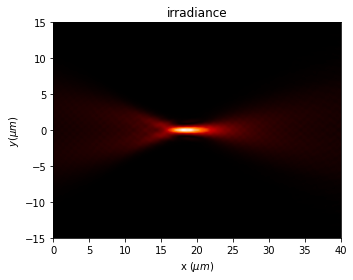

In [15]:
Irr= EH_xz.irradiance(has_draw=True, draw_borders=True, scale='scaled')

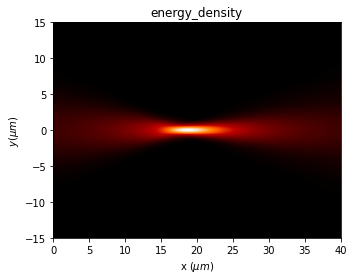

In [16]:
EH_xz.energy_density(has_draw=True, draw_borders=True, scale='scaled')

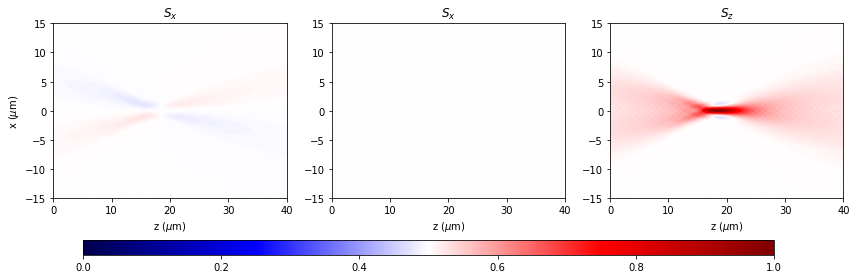

In [17]:
Sx, Sy, Sz = EH_xz.Poynting_vector_averaged(has_draw=True, draw_borders=True, scale='scaled')

<Figure size 432x288 with 0 Axes>

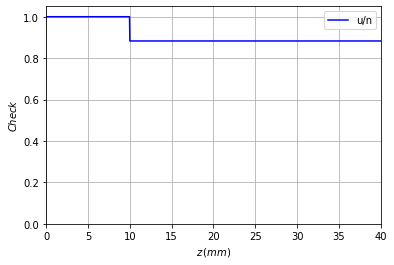

In [30]:
Sz_c = EH_xz.check_energy('U')
plt.ylim(0,1.05)

## Layer

In [19]:
x0 = np.linspace(-20*um, 20*um, 1024)
z0 = np.linspace(0*um, 40*um, 1024)
wavelength = 2.5* um

u0 = Scalar_source_X(x=x0, wavelength=wavelength)
u0.gauss_beam(A=1, x0=0, w0=2.5*um, z0=20*um, theta=0)



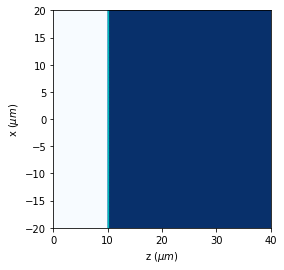

In [20]:
u_xz = Scalar_mask_XZ(x=x0, z=z0, wavelength=wavelength)
u_xz.semi_plane(r0=(0*um, 10*um), refractive_index=2)
u_xz.draw_refractive_index(scale='scaled')


In [21]:
j0 = Jones_vector().general_azimuth_ellipticity(azimuth=0*degrees, ellipticity=0*degrees)
print(j0)


E = 
[+1.000]   
[+0.000]   



In [22]:
EH_xz = Vector_field_XZ(x0,z0, wavelength)
EH_xz.incident_field(u0=u0, j0=j0)
EH_xz.refractive_index_from_scalarXZ(u_xz)


In [23]:
EH_xz.FP_WPM(has_edges=False)

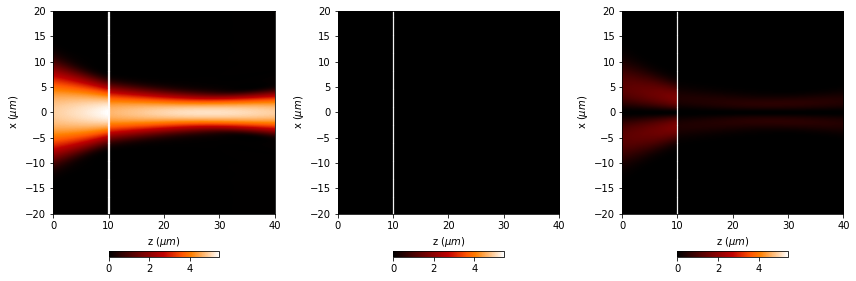

In [24]:
EH_xz.draw('intensities', logarithm=1e3, draw_z=True)


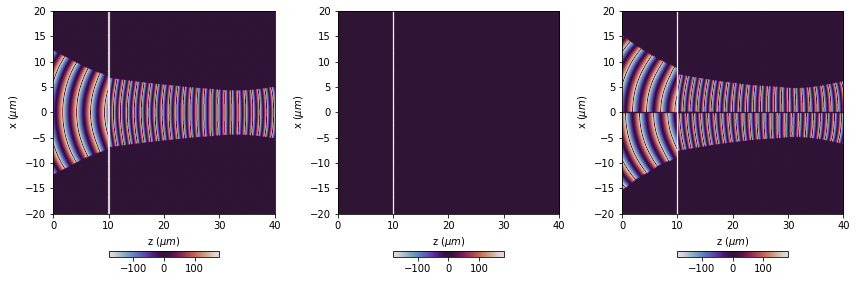

In [25]:
EH_xz.draw('phases', draw_z=True, percentage_intensity=0.001)

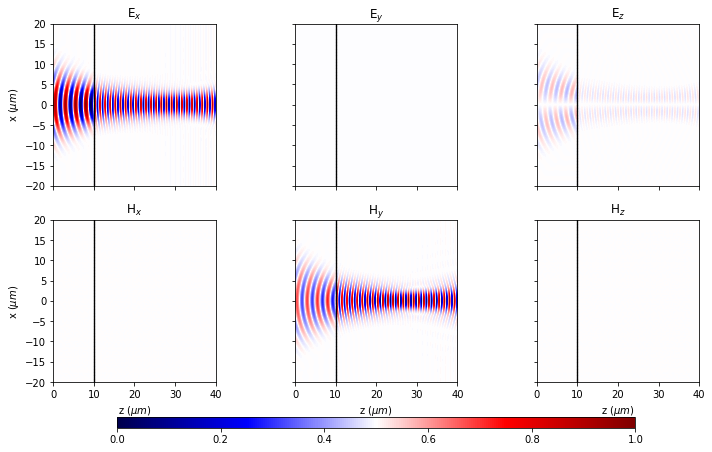

In [31]:
EH_xz.draw('EH', draw_z = True, color='k.')

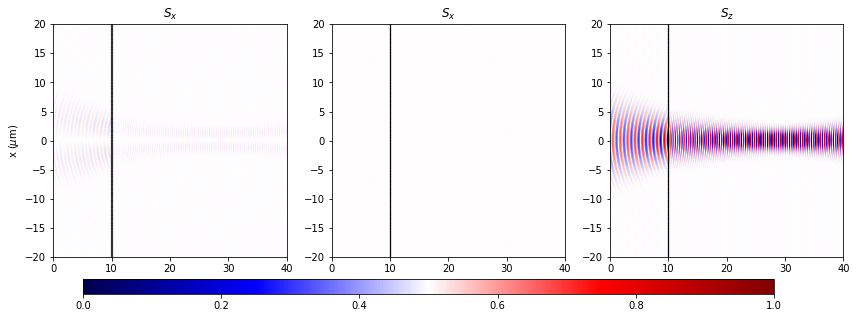

In [34]:
P_vector = EH_xz.Poynting_vector(has_draw=True, scale='scaled', color='k.')

<Figure size 432x288 with 0 Axes>

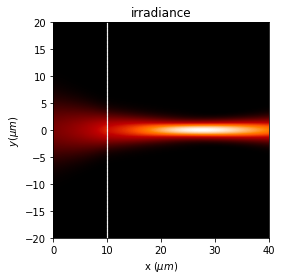

In [39]:
Irr= EH_xz.irradiance(has_draw=True, scale='scaled', color='w.')

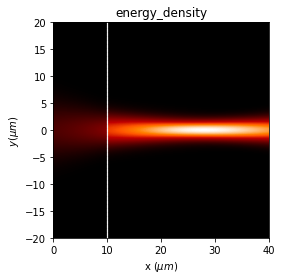

In [36]:
EH_xz.energy_density(has_draw=True, scale='scaled', color='w.')

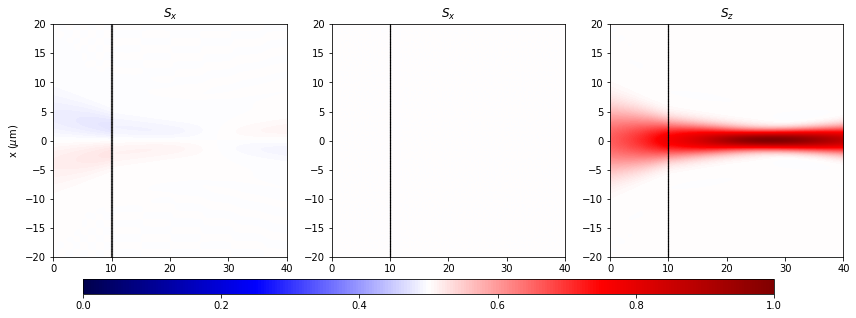

In [37]:
Sx, Sy, Sz = EH_xz.Poynting_vector_averaged(has_draw=True, scale='scaled', color='k.')

<Figure size 432x288 with 0 Axes>

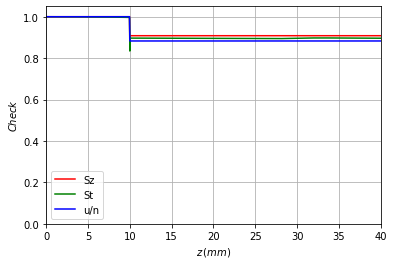

In [38]:
Sz_c = EH_xz.check_energy()
plt.ylim(0,1.05)